<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [32]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Fetching

In [4]:
dfMlb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/black_friday/train.csv')

# Data Preprocessing

In [5]:
dfMlb.fillna(-1, inplace=True)

# Convert categorical variables to numerical
dfMlb['Gender'] = dfMlb['Gender'].map({'M': 0, 'F': 1})
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
dfMlb['Age'] = dfMlb['Age'].map(age_mapping)
city_mapping = {'A': 0, 'B': 1, 'C': 2}
dfMlb['City_Category'] = dfMlb['City_Category'].map(city_mapping)
dfMlb['Stay_In_Current_City_Years'] = dfMlb['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

In [6]:
# Features and target
X = dfMlb.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = dfMlb['Purchase']

In [7]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=-1)  # Create an imputer object
X_imputed = imputer.fit_transform(X)  # Impute missing values in X

In [8]:
# Convert X_imputed back to a DataFrame (optional, but might be useful)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)

# Function for building and scoring Random Forest models

In [10]:
# Function for building and scoring Random Forest models
def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRfsMlb = RandomForestRegressor(random_state=1)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae

In [11]:
# Calculate Mean Absolute Error (using the imputed data)
mae = get_random_forest_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2227.403851233574


# Split numeric features into training and test sets

In [12]:
# Select numeric features
cols_num = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
Xnum = X[cols_num]

# Split numeric features into training and test sets
Xnum_train, Xnum_test, y_train, y_test = train_test_split(Xnum,y,train_size=0.8, test_size=0.2,random_state=1)

# Calculate Mean Absolute Error

In [13]:
# Try to build a model using all numeric features
get_random_forest_mae(Xnum_train, Xnum_test, y_train, y_test)

2215.5708974662803

# Visualizations

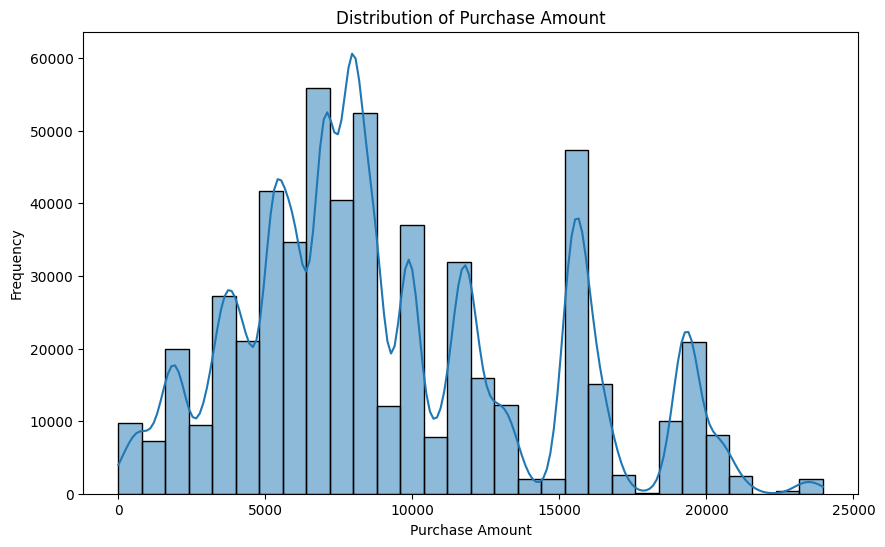

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(dfMlb['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

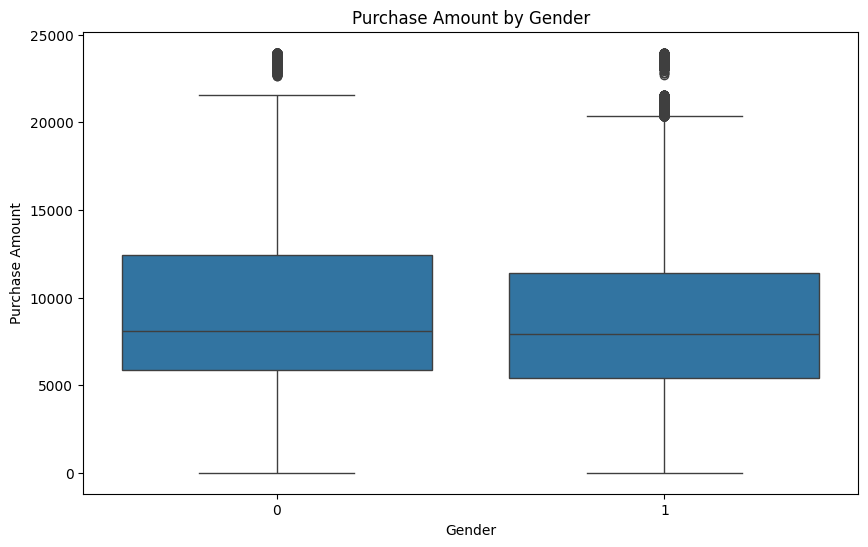

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=dfMlb)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

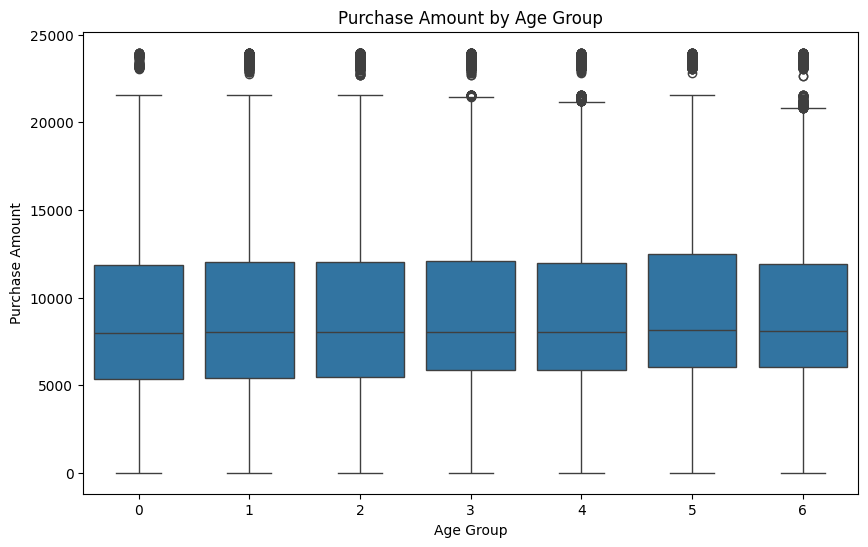

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=dfMlb)
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

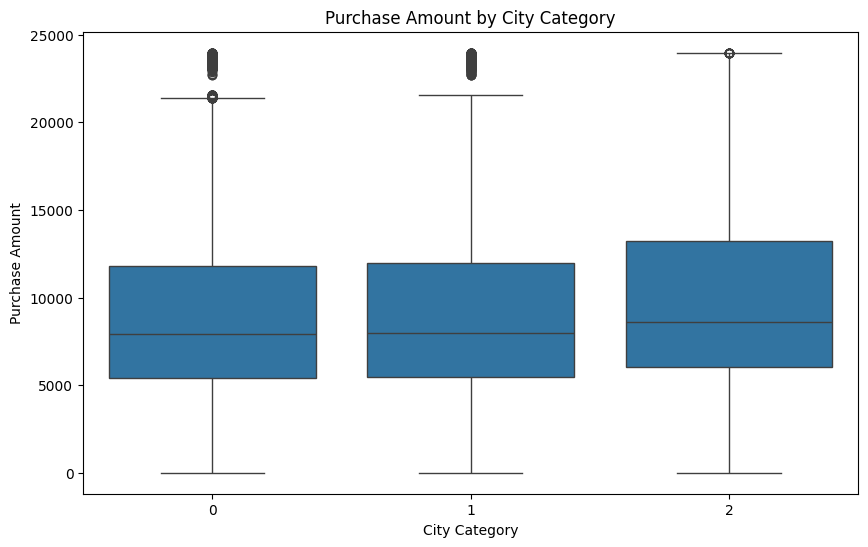

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Category', y='Purchase', data=dfMlb)
plt.title('Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()

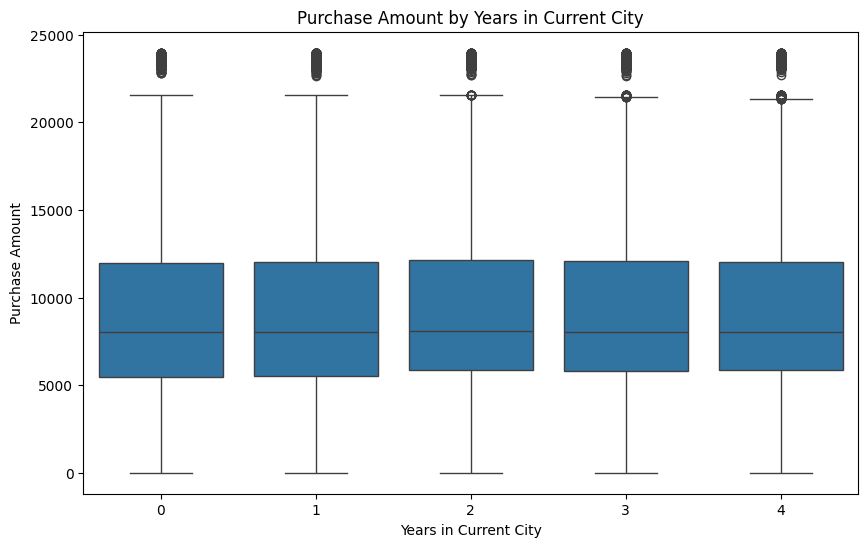

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=dfMlb)
plt.title('Purchase Amount by Years in Current City')
plt.xlabel('Years in Current City')
plt.ylabel('Purchase Amount')
plt.show()

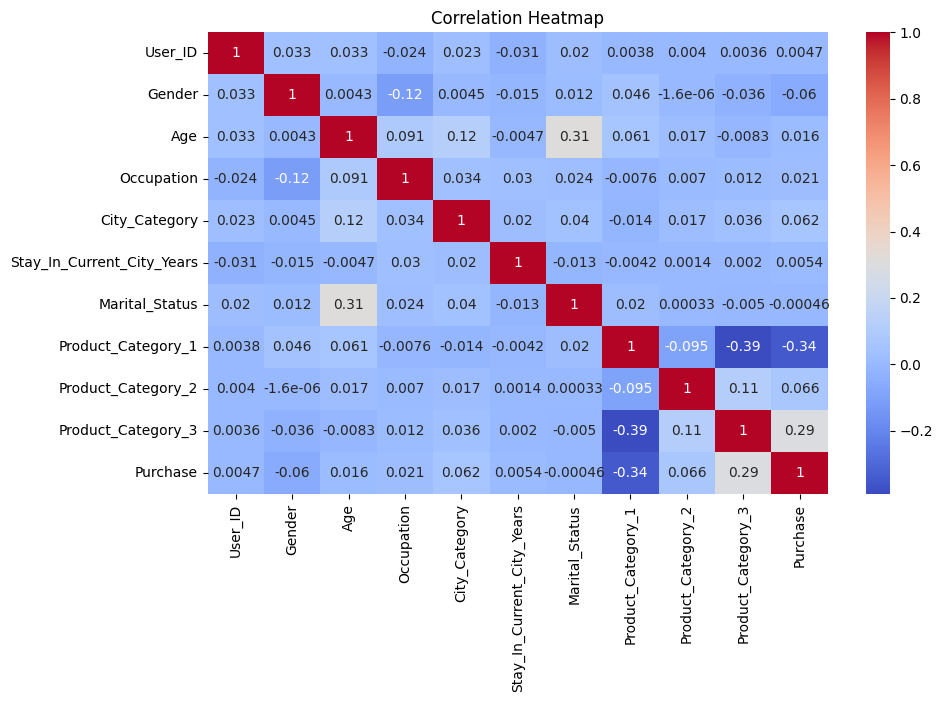

In [39]:
# Drop non-numeric columns before calculating correlation
numeric_df = dfMlb.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Display key statistics

In [40]:
key_stats = dfMlb.describe()
print(key_stats)

            User_ID         Gender            Age     Occupation  \
count  5.500680e+05  550068.000000  550068.000000  550068.000000   
mean   1.003029e+06       0.246895       2.496430       8.076707   
std    1.727592e+03       0.431205       1.353632       6.522660   
min    1.000001e+06       0.000000       0.000000       0.000000   
25%    1.001516e+06       0.000000       2.000000       2.000000   
50%    1.003077e+06       0.000000       2.000000       7.000000   
75%    1.004478e+06       0.000000       3.000000      14.000000   
max    1.006040e+06       1.000000       6.000000      20.000000   

       City_Category  Stay_In_Current_City_Years  Marital_Status  \
count  550068.000000               550068.000000   550068.000000   
mean        1.042640                    1.858418        0.409653   
std         0.760211                    1.289443        0.491770   
min         0.000000                    0.000000        0.000000   
25%         0.000000                    1.00000

In [14]:
# Count number of missing values in each column of the training data
Xnum_train.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [15]:
# Identify columns with missing values and then drop such columns
cols_num_null = [col for col in Xnum_train.columns
    if Xnum_train[col].isnull().any()]
Xnum_train_drpnull = Xnum_train.drop(cols_num_null, axis=1)
Xnum_test_drpnull = Xnum_test.drop(cols_num_null, axis=1)

In [16]:
print('MAE from Approach 1 (Drop features with missing values):')
print(get_random_forest_mae(Xnum_train_drpnull, Xnum_test_drpnull, y_train, y_test))

MAE from Approach 1 (Drop features with missing values):
2215.5708974662803


In [17]:
# Replace with mean value
Xnum_train_repnull = Xnum_train.fillna(Xnum_train.mean())
Xnum_test_repnull = Xnum_test.fillna(Xnum_train.mean())

print('MAE from Approach 2 (Replace missing values with mean):')
print(get_random_forest_mae(Xnum_train_repnull, Xnum_test_repnull, y_train, y_test))

MAE from Approach 2 (Replace missing values with mean):
2215.5708974662803


In [18]:
# Going forward, let us replace all missing numeric values with the column mean
X_train[cols_num]=Xnum_train_repnull[cols_num]
X_test[cols_num]=Xnum_test_repnull[cols_num]

In [19]:
# Select non-numeric features
cols_obj = [col for col in X.columns if X[col].dtype == 'object']
cols_obj

[]

In [20]:
# Label encoding on all non-numeric features

from sklearn.preprocessing import LabelEncoder

Xle_train = X_train.copy()
Xle_test = X_test.copy()
# Apply label encoder to each column with non-numeric data
label_encoder = LabelEncoder()
for col in cols_obj:
    Xle_train[col] = label_encoder.fit_transform(X_train[col])
    Xle_test[col] = label_encoder.transform(X_test[col])

In [24]:
# Select categorical features
cols_cat = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique() < 10]

In [25]:
# Handle missing values before label encoding
X_train.fillna(X_train.mode().iloc[0], inplace=True) # Fill missing values with mode for each column
X_test.fillna(X_test.mode().iloc[0], inplace=True)

In [26]:
# Label encoding on only categorical features
from sklearn.preprocessing import LabelEncoder

Xle_train = X_train.copy()
Xle_test = X_test.copy()

label_encoder = LabelEncoder()
for col in cols_cat:
    Xle_train[col] = label_encoder.fit_transform(X_train[col])
    Xle_test[col] = label_encoder.transform(X_test[col])

In [28]:
# Encode and Build/Score using all Categorical columns
mae = get_random_forest_mae(Xle_train[cols_num + cols_cat], Xle_test[cols_num + cols_cat], y_train, y_test)
print("MAE from Label Encoding all Categorical columns:")
print(mae)

MAE from Label Encoding all Categorical columns:
4134.5776417441


In [29]:
from xgboost import XGBRegressor

#Build and score default Gradient Boosting Model
mdlXgbMlb = XGBRegressor()
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
4078.6288149574643


In [30]:
#Build and score a tuned Gradient Boosting Model
mdlXgbMlb = XGBRegressor(n_estimators=5000, learning_rate=0.01, max_depth=5)
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
4077.42310564948
